## Disponível online

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/carlos-adir/UnB-Courses/blob/dev/mntf/fem-nurbs1D.ipynb)

Esse python notebook está disponível online no GitHub através do link:

* [GitHub/carlos-adir/UnB-Courses/mntf/fem-nurbs1D](https://github.com/carlos-adir/UnB-Courses/blob/dev/mntf/fem-nurbs1D.ipynb)

In [1]:
import os
os.system("pip install numpy")
# os.system("pip install pandas")
os.system("pip install mpmath")
os.system("pip install matplotlib")
os.system("pip install compmec-nurbs")
import numpy as np
import sympy as sp
import math
import mpmath
from typing import Callable, Iterable, Optional, Tuple
from matplotlib import pyplot as plt
from compmec import nurbs  
from helper import rungekutta, getH, getD

# Teoria parte 1

Existem diversos métodos para resolver equações diferenciais ordinárias (EDOs), aqui veremos algumas delas.
O método utilizado aqui será o de Elementos Finitos (Galerkin) utilizando BSplines como funções de base.

### Introdução

Seja uma equação diferencial ordinária de primeira ordem

$$
\dfrac{dy}{dt} = f(t)
$$

no intervalo $t \in \left[a, \ b\right]$ e com condição inicial

$$
y(t = a) = y_0
$$

Resolvendo essa EDO analiticamente (se possível), podemos obter exatamente $y(t)$ que é de nosso interesse.
Contudo, tal solução analítica nem sempre é possível ou é muito custosa e nos contentamos com a solução numérica e aproximada.

Para a solução numérica, a inspiração dos elementos finitos é ter uma aproximação $w(t) \approx y(t)$ no intervalo $\left[a, \ b\right]$.
Essa função $w(t)$ é descrita como uma soma de $n$ pesos $w_{i}$ multiplicado por funções de base $\varphi_{i}(t)$ de nossa escolha:

$$w(t) = \sum_{j=0}^{n-1} w_j \cdot \varphi_{j}(t) = \left[w\right]^{T}\cdot \left[\varphi\right] $$

Em que $\left[w\right]$ é o vetor de pesos (que queremos encontrar) e $\left[\varphi\right]$ é o vetor de funções bases conhecidas.

Então o método de elementos finitos de Galerkin diz que queremos reduzir o resíduo da integral para cada função de base $\varphi_{i}$ (mais detalhes [aqui](https://www.youtube.com/watch?v=JmjdwhBkvq8)).

$$\int_{a}^{b} \left(\dfrac{dw}{dt}-f(t)\right) \cdot \varphi_{i} \ \ dt = 0 \ \ \ \ \forall \ i$$

Expandindo

$$
\sum_{j} w_{j} \cdot \int_{a}^{b} \dfrac{\varphi_j}{dt} \cdot \varphi_{i} \ \ dt = \int_{a}^{b} f(t) \cdot \varphi_{i} \ \ dt \ \ \ \forall \ i
$$

Nomeando $A_{ij}$ e $B_{i}$ como constantes, então obtemos um sistema linear dado por:

$$
A_{ij} = \int_{a}^{b} \dfrac{\varphi_j}{dt} \cdot \varphi_i \ dt \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ B_{i} =  \int_{a}^{b}  \varphi_i  \cdot f  \ dt 
$$

$$
\begin{bmatrix}
A_{00} & A_{01} & \cdots & A_{0,n-1} \\
A_{10} & A_{11} & \cdots & A_{1,n-1} \\
\vdots & \vdots & \ddots & \vdots \\
A_{n-1,0} & A_{n-1,1} & \cdots & A_{n-1,n-1} \\
\end{bmatrix}
\begin{bmatrix}
w_{0} \\ w_1 \\ \vdots \\ w_{n-1}
\end{bmatrix}=
\begin{bmatrix}
B_{0} \\ B_1 \\ \vdots \\ B_{n-1}
\end{bmatrix}
$$

Então para achar a aproximação $w(t)$ desejada, basta resolver o sistema linear $[A]\cdot [w] = [B]$.

Como conhecemos as funções $[\varphi]$, então é possível calcular os termos de $[A]$ e $[B]$.
Podemos escolher as funções base $\left[\varphi\right]$ tais que muitos termos da matriz $[A]$ sejam zeros (logo, não precisamos calcular todos) e cujas integrais são fáceis de calcular.

## Funções de base

#### BSplines lineares

Existem diversas funções bases que podemos utilizar. Nós utilizaremos um grupo de funções chamadas BSpline lineares.
> BSpline são mais complexas e genéricas. Para mais detalhes, segue a sugestão de um [video introdutório](https://youtu.be/jvPPXbo87ds) sobre o assunto.

Como mostra na figura abaixo, temos 4 funções de base em azul, que quando multiplicadas por pesos e somadas, conseguimos obter a curva em vermelho.

![](https://upload.wikimedia.org/wikipedia/commons/6/69/Finite_element_method_1D_illustration2.png?20060318200257)

Assim, tem-se $n$ funções $N_{i,1}(u)$:

$$\left[N_{1}\right] := \begin{bmatrix}N_{0,1} & N_{1,1} & \cdots & N_{n-1, 1}\end{bmatrix}$$

* $i$ representa qual a função selecionada, no caso assume $i=0, \ \cdots, \ n-1$
* $u$ é a variável da função, que fica em $\left[0, \ 1\right]$.
* Teremos um vetor $U$ de nós (```knot vector```) com a posição dos nós utilizados.


#### Aplicação em elementos finitos

Como utilizaremos BSplines como funções base, então substituimos $\varphi_{i}(t)$ por $N_{i,1}(u)$.

Assim, retirando as contas complicadas de integração, a matriz $A$ se torna uma soma de matrizes menores:

> $$\begin{align*} \left[A\right] & = \int_{0}^{1} \left[N_{p}\right] \otimes \left[\dfrac{dN_{p}}{du}\right] \ dt \\ & = \sum_{k=p}^{n-1} \int_{u_k}^{u_{k+1}}  \left[N_{p}\right] \otimes \left[\dfrac{dN_{p}}{du}\right] \ dt \end{align*}$$
> 
> No caso de $n=4$ teremos

# Exercícios com 1 DOF

Os exercícios aqui envolvem apenas EDOs, com apenas uma variável. Mas todos eles são da forma

$$
\dfrac{dy}{dt} = f(t) 
$$

Por questão de conveniência, assumiremos que $t = u$ e que o intervalo será sempre de $0$ a $1$. 
É possível expandir, mas basta fazer a transformação de variáveis

### Exercicio 1

> Resolva a EDO
>
> $$y' = \pi \cos \pi u$$
> $$0 \le u \le 1 \ \ \ \ \ \ y(0)=0$$
> 
> Solução analítica
>
> $$y(u) = \sin \pi u$$
>
> Utilizando SPlines lineares, com $3$ pontos igualmente espaçados

**Nota:** Para o primeiro exemplo, teremos um pouco de matemática, mas usualmente não é assim

Como primeiro exemplo, teremos apenas $n=3$ e os nós igualmente espaçados, de forma que teremos o vetor de nós:

$$
U = \left[0, 0, \ \dfrac{1}{2}, \ 1, 1\right]
$$

U =  [0, 0.0, 0.5, 1.0, 1]


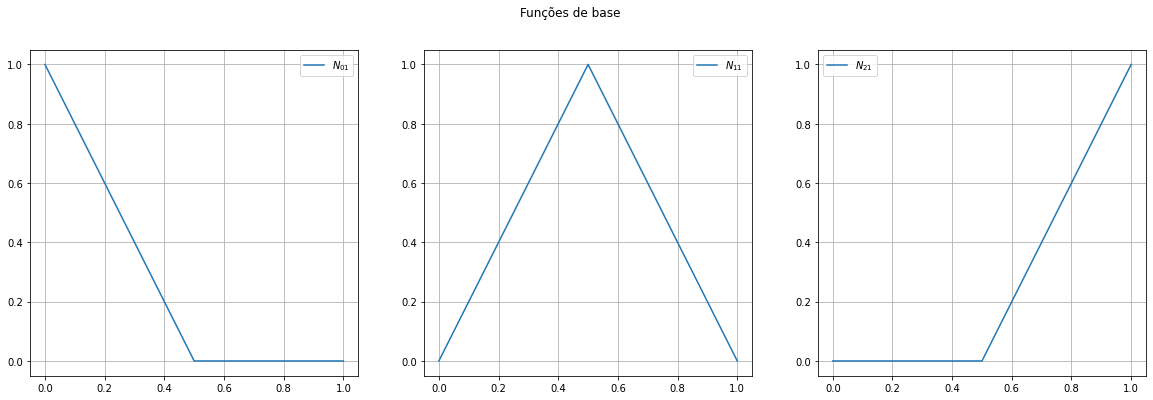

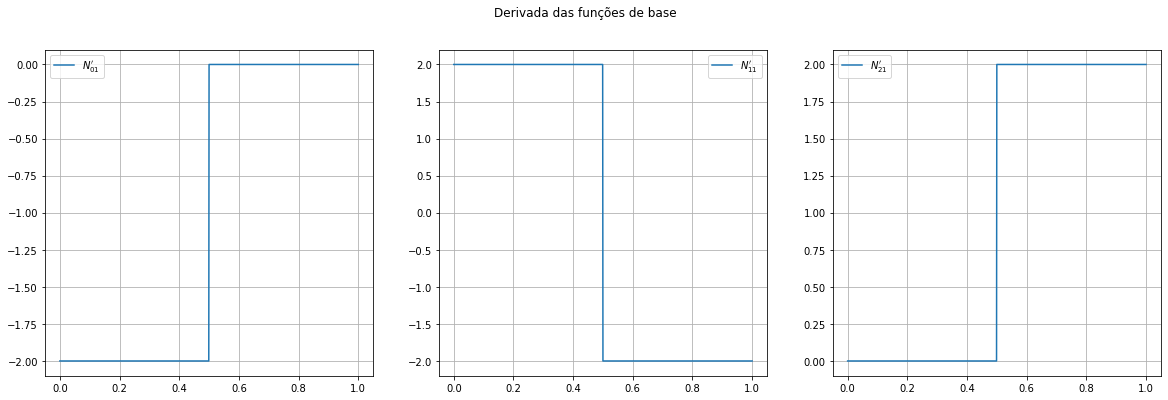

In [2]:
U = nurbs.GeneratorKnotVector.uniform(degree=1, npts=3)
print("U = ", U)
N = nurbs.SplineBaseFunction(U)
dN = nurbs.SplineBaseFunction(U)
dN.derivate()
uplot = np.linspace(0, 1, 1025)
fig, axis = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle(r"Funções de base")
axis[0].plot(uplot, N[0](uplot), label=r"$N_{01}$")
axis[1].plot(uplot, N[1](uplot), label=r"$N_{11}$")
axis[2].plot(uplot, N[2](uplot), label=r"$N_{21}$")
for i in range(3):
    axis[i].legend()
    axis[i].grid()
    
fig, axis = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle(r"Derivada das funções de base")
axis[0].plot(uplot, dN[0](uplot), label=r"$N_{01}'$")
axis[1].plot(uplot, dN[1](uplot), label=r"$N_{11}'$")
axis[2].plot(uplot, dN[2](uplot), label=r"$N_{21}'$")
for i in range(3):
    axis[i].legend()
    axis[i].grid()

Agora plotamos os gráficos de $N_{i1}\cdot N_{j1}'$

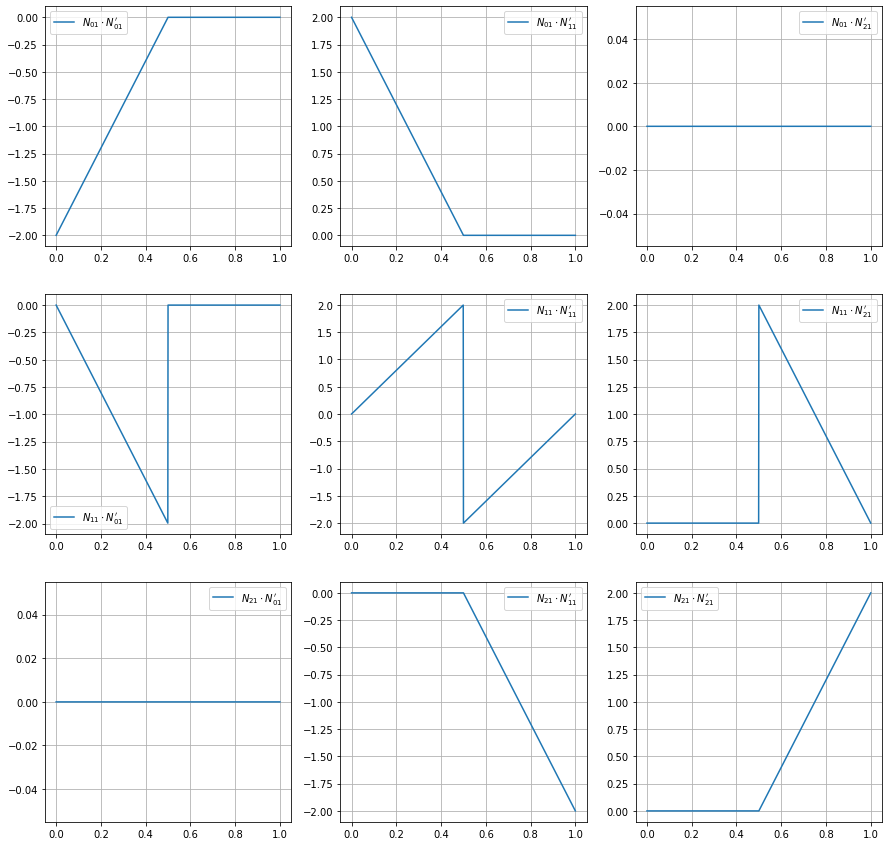

In [3]:
fig, axis = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        axis[i, j].plot(uplot, N[i](uplot)*dN[j](uplot), label=r"$N_{%d1}\cdot N_{%d1}'$"%(i,j))
        axis[i, j].legend()
        axis[i, j].grid()

Agora precisamos integrar as funções acima e colocar na matriz $[A]$.
Evitando as contas desnecessárias, teremos a matriz:

$$
A = \begin{bmatrix}
\frac{-1}{2} & \frac{1}{2} & 0 \\
\frac{-1}{2} & 0 & \frac{1}{2} \\
0 & \frac{-1}{2} & \frac{1}{2}
\end{bmatrix}
$$

Agora para $B$ teremos

$$
B = \left[\dfrac{2}{\pi}, \ 0, \ \dfrac{-2}{\pi}\right]
$$

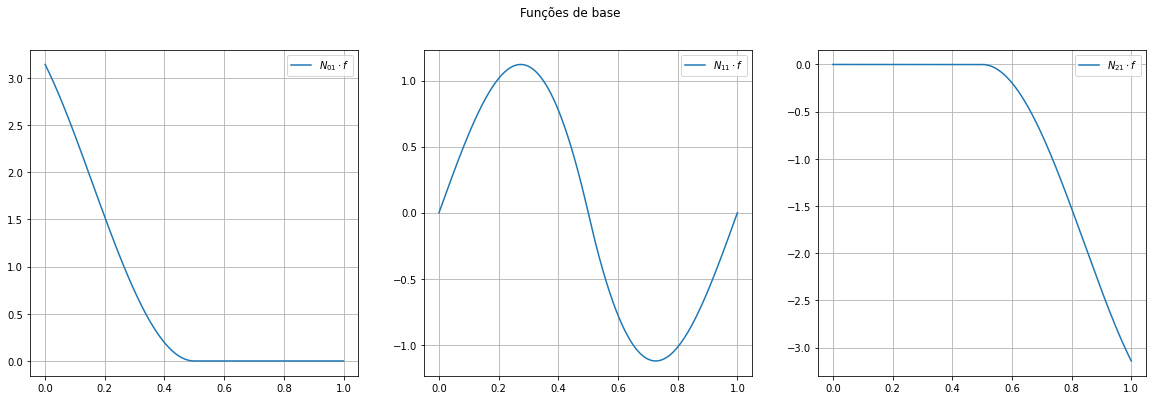

In [4]:
def f(u):
    return np.pi*np.cos(np.pi*u)

fig, axis = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle(r"Funções de base")
axis[0].plot(uplot, N[0](uplot)*f(uplot), label=r"$N_{01} \cdot f$")
axis[1].plot(uplot, N[1](uplot)*f(uplot), label=r"$N_{11} \cdot f$")
axis[2].plot(uplot, N[2](uplot)*f(uplot), label=r"$N_{21} \cdot f$")
for i in range(3):
    axis[i].legend()
    axis[i].grid()

Contudo, vemos que $\det (A) = 0$, de forma que não podemos resolver o sistema linear $\left[A\right]\cdot \left[w\right] = \left[B\right]$.
Isso pois falta a condição inicial:

> Como temos $y(t=0) = y_0$, então $w(t=0) = y_0$. De forma que 
>
> $$w(t) = w_0 \cdot N_{01}(t) + w_1 \cdot N_{11}(t) + w_2 \cdot N_{21}(t)$$
> $$w(0) = w_0 \cdot \underbrace{N_{01}(0)}_{1} + w_1 \cdot \underbrace{N_{11}(0)}_{0} + w_2 \cdot \underbrace{N_{21}(0)}_{0}$$
> $$\Rightarrow \boxed{w_0 = y_0}$$

Assim, a primeira equação (que é devido à função $\varphi_0$) na verdade não existe, e sim teremos o sistema:

$$
\begin{bmatrix}
\frac{-1}{2} & 0 & \frac{1}{2} \\
0 & \frac{-1}{2} & \frac{1}{2}
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ \left(\frac{-2}{\pi}\right)
\end{bmatrix} \Rightarrow
\begin{bmatrix}
0 & \frac{1}{2} \\
\frac{-1}{2} & \frac{1}{2}
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2
\end{bmatrix} =
\begin{bmatrix}
\left(\frac{y_0}{2}\right) \\ \left(\frac{2}{\pi}\right) 
\end{bmatrix} \Rightarrow \begin{cases}
w_1 = y_0 + \frac{4}{\pi} \\ w_2 = y_0
\end{cases}
$$

pesos numericos:  [0, 1.2732395447351628, 0.0]


Text(0.5, 1.0, 'Erro da solução')

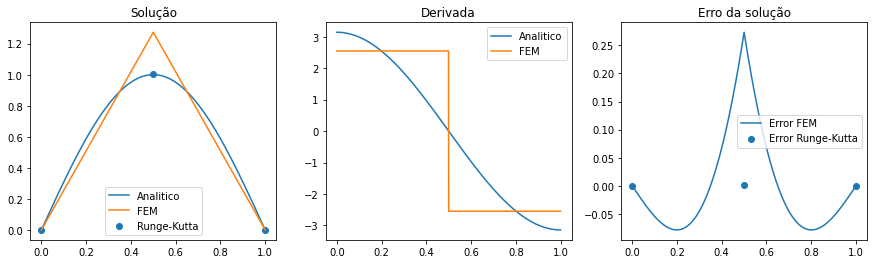

In [5]:
w0 = 0
A = np.array([[0, 0.5], [-0.5, 0.5]])
B = np.array([w0/2, -2/np.pi])
wvals = [w0] + list(np.linalg.solve(A, B))
print("pesos numericos: ", wvals)
urunge = np.linspace(0, 1, 3)
frunge = lambda u, y: np.pi*np.cos(np.pi*u) 
wrunge = rungekutta(frunge, w0, urunge)
uplot = np.linspace(0, 1, 1025)
U = nurbs.KnotVector([0, 0, 0.5, 1, 1])
N = nurbs.SplineBaseFunction(U)

fig, axis = plt.subplots(1, 3, figsize=(15, 4))
axis[0].plot(uplot, np.sin(np.pi*uplot), label=r"Analitico")
axis[0].plot(uplot, wvals @ N[:, 1](uplot), label=r"FEM")
axis[0].scatter(urunge, wrunge, label=r"Runge-Kutta")
axis[0].legend()
axis[0].set_title(r"Solução")

axis[1].plot(uplot, np.pi*np.cos(np.pi*uplot), label=r"Analitico")
axis[1].plot(uplot, wvals @ getD(1, U) @ N[:,0](uplot), label=r"FEM")
axis[1].legend()
axis[1].set_title(r"Derivada")

axis[2].plot(uplot, wvals @ N[:, 1](uplot)-np.sin(np.pi*uplot), label=r"Error FEM")
axis[2].scatter(urunge, wrunge-np.sin(np.pi*urunge), label=r"Error Runge-Kutta")
axis[2].legend()
axis[2].set_title(r"Erro da solução")

### Exercicio 2

> Resolva a EDO
>
> $$y' = \pi \cos \pi u$$
> $$0 \le u \le 1 \ \ \ \ \ \ y(0)=0$$
> 
> Solução analítica
>
> $$y(u) = \sin \pi u$$
>
> Utilizando SPlines lineares, com $11$ pontos igualmente espaçados

Com $n$ pontos, teremos 

$$
U = \left[\underbrace{0}_{u_0}, \ \underbrace{0}_{u_1}, \ \underbrace{\left(\frac{1}{n-1}\right)}_{u_2}, \ \cdots, \ \underbrace{\left(\frac{n-2}{n-1}\right)}_{u_{n-1}}, \ \underbrace{1}_{u_{n}}, \ \underbrace{1}_{u_{n+1}}\right]
$$

Assim, teremos $(n-1)$ intervalos: $\left[u_1, \ u_2\right]$, $\cdots$, $\left[u_{n-1}, \ u_{n}\right]$.
E também $n$ funções $N_{i1}$:

$$
\left[N_1\right] := \left[N_{0,1}, \ \cdots, \ N_{n-1, 1}\right] _{(n)}
$$

##### Calculando $A$

> Iniciamos com
> 
> $$\left[A\right]_{n \times n} = \int_{0}^{1} \left[N_{1}\right] \otimes \left[\dfrac{d}{dt}N_{1}\right] \ du$$
> 
> Uma coisa interessante sobre SPlines é sua derivada, que é dada por:
> 
> $$\dfrac{d}{du}N_{i1} = \alpha_{i,1} \cdot N_{i0} - \alpha_{i+1,1} \cdot N_{i+1,0} \ \ \ \ \ \ \ \text{com} \ \alpha_{i,1} = \begin{cases}\frac{1}{u_{i+1}-u_{i}} \ \ \ \ \ \text{if} \ u_{i} \ne u_{i+1}\\ 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{else} \end{cases}$$
> 
> De forma que
> 
> $$\dfrac{d}{du} \begin{bmatrix} N_{01} \\ N_{11} \\ \vdots \\ N_{n-1,1} \end{bmatrix} = \underbrace{\begin{bmatrix} \alpha_{0,1} & -\alpha_{1,1} & & & \\ & \alpha_{1,1} & -\alpha_{2,1} & & \\ & & \ddots & \ddots &  \\ & & & \alpha_{n-2,1}& -\alpha_{n-1,1} \\ & & & & \alpha_{n-1,1} \end{bmatrix}}_{\left[D_{1}\right]} \begin{bmatrix} N_{00} \\ N_{10} \\ \vdots \\ N_{n-1,0} \end{bmatrix}$$
>
> Assim, teremos
>
> $$\begin{align*}\left[A\right] & = \int_{0}^{1}\left[N_1\right] \otimes \left[\dfrac{dN_1}{dt}\right] \ du \\ & = \int_{0}^{1} \left[N_1\right] \otimes \left(\left[D_{1}\right] \left[N_{0}\right]\right) \ du \\ & = \left(\underbrace{\int_{0}^{1} \left[N_{0}\right] \otimes \left[N_{1}\right] \ du}_{\left[H_{01}\right]}\right)^{T} \cdot \left[D_{1}\right]^{T} \\ & = \left[H_{01}\right]^{T} \cdot \left[D_{1}\right]^{T}\end{align*}$$

##### Calculando $B$:

> Até então temos que
> $$B_{i} = \int_{0}^{1} f(u) \cdot N_{i1}(u) \ du$$
> Calcular essa integral pode ser dificil, e generalizar quase impossível.
> Uma das formas é fazer uma interpolação de $f$ para que possamos integrar.
> A interpolação que faremos é utilizar a mesma SPline linear que usamos funções base.
> 
> Isto é, utilizaremos $g(u)$ no lugar de $f(u)$:
>
> $$g(u) = \sum_{j=0}^{n-1} N_{j1}(u) \cdot G_{j} \approx f(u)$$
>
> Calcular os valores $G$ envolve o ```fit``` de uma função para uma spline. Supondo que $g(u_i) = f(u_i)$, então teremos:
>
> $$f(u_i) = \sum_{j=0}^{n-1} N_{j1}(u_i) \cdot G_j \ \ \ \ \forall i$$
> $$\left[f\right] = \left[N_{1}(\mathbf{u})\right] \cdot \left[G\right]$$
> $$\left[G\right] = \left[N_{1}(\mathbf{u})\right]^{-1} \left[f\right]$$
> 
> Agora supondo que já temos $G$, então calculamos $B_i$ utilizando:
>
> $$B_i = \int_{0}^{1} N_{i1} \left(\sum_{j=0}^{n-1} G_j \cdot N_{j1}\right) \ du = \sum_{j=0}^{n-1}\left(\underbrace{\int_{0}^{1} N_{i1} N_{j1} \ du}_{\left[H_{11}\right]_{ij}}\right) \cdot G_{j}$$
> $$\left[B\right] = \left[H_{11}\right] \cdot \left[G\right]$$

E então podemos implementar:

In [6]:
uplot = np.linspace(0, 1, 1025)
def f(u):
    return np.pi*np.cos(np.pi*u)
y0 = 0

n = 7  # Numero de divisoes
U = nurbs.GeneratorKnotVector.uniform(degree=1, npts=n)
N = nurbs.SplineBaseFunction(U)
# Montar a matriz A
D1 = getD(1, U)
H01 = getH(0, 1, N)
A = H01.T @ D1.T
# Montar a matriz B
G = np.linalg.lstsq(N(uplot).T, f(uplot), rcond=None)[0]
H11 = getH(1, 1, N)
B = H11 @ G
# Condicao inicial
A[0] = N(0)
B[0] = y0
# Resolver o sistema
wvals = np.linalg.solve(A, B)

Text(0.5, 1.0, 'Erro da solução')

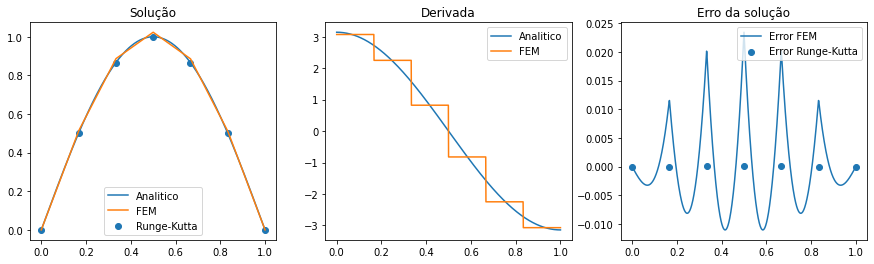

In [7]:
urunge = np.linspace(0, 1, n)
frunge = lambda u, y: np.pi*np.cos(np.pi*u) 
wrunge = rungekutta(frunge, y0, urunge)

solution = lambda u: np.sin(np.pi*u)
dsolution = lambda u: f(u)

fig, axis = plt.subplots(1, 3, figsize=(15, 4))
axis[0].plot(uplot, solution(uplot), label=r"Analitico")
axis[0].plot(uplot, wvals @ N[:, 1](uplot), label=r"FEM")
axis[0].scatter(urunge, wrunge, label=r"Runge-Kutta")
axis[0].legend()
axis[0].set_title(r"Solução")

axis[1].plot(uplot, dsolution(uplot), label=r"Analitico")
axis[1].plot(uplot, wvals @ D1 @ N[:,0](uplot), label=r"FEM")
axis[1].legend()
axis[1].set_title(r"Derivada")

axis[2].plot(uplot, wvals @ N[:, 1](uplot) -solution(uplot), label=r"Error FEM")
axis[2].scatter(urunge, wrunge-solution(urunge), label=r"Error Runge-Kutta")
axis[2].legend()
axis[2].set_title(r"Erro da solução")

### Exercicio 3

> Resolva a EDO
>
> $$y' = 2-2u+4u^2-4u^3-4u^4$$
> $$0 \le t \le u \ \ \ \ \ \ y(0)=1$$
> 
> Solução analítica
>
> $$y(u) = 1+2u-u^2+ \frac{4}{3}u^3-u^4-\frac{4}{5}u^5$$
> 
> Utilizando SPlines lineares, com $21$ pontos igualmente espaçados

Da mesma forma que anteriormente, mas dessa vez não precisamos de todos as contas:

In [8]:
y0 = 1
n = 21
def f(u):
    return 2 - 2*u + 4*u**2 - 4*u**3 - 4*u**4

n = 7  # Numero de divisoes
U = nurbs.GeneratorKnotVector.uniform(degree=1, npts=n)
N = nurbs.SplineBaseFunction(U)
# Montar a matriz A
D1 = getD(1, U)
H10 = getH(1, 0, N)
A = H10 @ D1.T
# Montar a matriz B
G = np.linalg.lstsq(N(uplot).T, f(uplot), rcond=None)[0]
H11 = getH(1, 1, N)
B = H11 @ G
# Condicao inicial
A[0] = N(0)
B[0] = y0
# Resolver o sistema
wvals = np.linalg.solve(A, B)

Text(0.5, 1.0, 'Erro da solução')

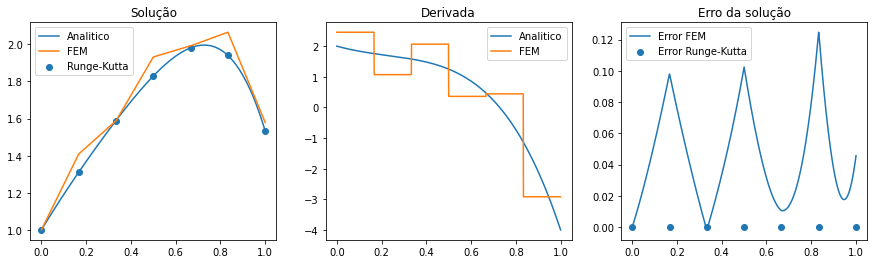

In [9]:
urunge = np.linspace(0, 1, n)
frunge = lambda u, y: 2 - 2*u + 4*u**2 - 4*u**3 - 4*u**4
wrunge = rungekutta(frunge, y0, urunge)

solution = lambda u: 1 + 2*u - u**2 + (4/3)*u**3 - u**4 - (4/5)*u**5
dsolution = lambda u: f(u)

fig, axis = plt.subplots(1, 3, figsize=(15, 4))
axis[0].plot(uplot, solution(uplot), label=r"Analitico")
axis[0].plot(uplot, wvals @ N[:, 1](uplot), label=r"FEM")
axis[0].scatter(urunge, wrunge, label=r"Runge-Kutta")
axis[0].legend()
axis[0].set_title(r"Solução")

axis[1].plot(uplot, dsolution(uplot), label=r"Analitico")
axis[1].plot(uplot, wvals @ D1 @ N[:,0](uplot), label=r"FEM")
axis[1].legend()
axis[1].set_title(r"Derivada")

axis[2].plot(uplot, wvals @ N[:, 1](uplot) -solution(uplot), label=r"Error FEM")
axis[2].scatter(urunge, wrunge-solution(urunge), label=r"Error Runge-Kutta")
axis[2].legend()
axis[2].set_title(r"Erro da solução")

# Teoria parte 2


### Generalização de BSplines

Até o momento utilizamos apenas BSplines lineares (de classe $C^{0}$), mas para tornar mais genérico (e obtermos curvas de grau $C^{1}$, $C^{2}$, $\cdots$) adicionamos o termo $p$ que é o grau do polinômio usado.
Assim, tem-se $n$ funções $N_{i,p}(u)$:
$$\left[N_{p}\right] := \begin{bmatrix}N_{0,p} & N_{1,p} & \cdots & N_{n-1, p}\end{bmatrix}$$

* $i$ representa qual a função selecionada, no caso assume $i=0, \ \cdots, \ n-1$
* $p$ representa o grau do polinômio (geralmente $1 \le p \le 3$), em que
    * $p=1$ indica linear,
    * $p=2$ quadrático
    * $p=3$ cúbico.
* $u$ é a variável da função, que fica em $\left[0, \ 1\right]$.
* O vetor de nós $U$
$$U = \left[u_0, \ u_1, \ \cdots, \ u_p, \ u_{p+1}, \ \cdots, \ u_{n-1}, \ u_{n}, \ \cdots, \ u_{n+p}\right]$$
$$0 = u_0 = u_1 = \cdots = u_p < u_{p+1} \le \cdots \le u_{n-1} < u_{n} = \cdots = u_{n+p} = 1$$

Suas propriedades são de
1. $N_{ij}$ é local
    $$N_{ij}(u) = 0 \ \ \ \ \ \ \forall \ u \notin \left[u_{i}, \ u_{i+j+1}\right) \ \ \ \ \ \ \ \ \ 0  \le j \le p$$
2. No intervalo $[u_{k},  \ u_{k+1}]$, apenas $j+1$ funções são não nulas
    $$N_{ij}(u) = 0 \ \ \ \text{on} \ \left[u_k, \ u_{k+1}\right] \ \ \ \text{if} \ i \notin \left\{k-j, \ \cdots, \ k\right\}$$
3. A derivada $\left[N_{j}'\right]$ é escrita usando $\left[N_{j-1}\right]$
    $$\dfrac{d}{du}\begin{bmatrix}N_{0j} \\ N_{1j} \\ \vdots \\ N_{n-1,j}\end{bmatrix} = \underbrace{\begin{bmatrix} \alpha_{0} & -\alpha_{1} & & & \\ & \alpha_{1} & -\alpha_{2} & & \\ & & \ddots & \ddots &  \\ & & & \alpha_{n-2}& -\alpha_{n-1} \\ & & & & \alpha_{n-1} \end{bmatrix}}_{\left[D_j\right]}\begin{bmatrix}N_{0,j-1} \\ N_{1,j-1} \\ \vdots \\ N_{n-1,j-1}\end{bmatrix}$$
    $$\alpha_{ij} = \begin{cases}\frac{j}{u_{i+j}-u_{i}} \ \ \ \ \ \text{if} \ u_{i} \ne u_{i+j}\\ 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{else} \end{cases}$$

### Aplicação em elementos finitos

Do mesmo modo feito anteriormente, substituimos $\varphi_{i}(t)$ por $N_{ip}(u)$.
Por conveniência de notação, definimos o vetor $\left[N_j\right]$ com $n$ funções:

$$[N_j] = \begin{bmatrix}N_{0, \ j} & N_{1, \ j} & \cdots & N_{n-2, \ j} & N_{n-1, \ j}
\end{bmatrix}_{(n)} \ \ \ \ \ \ \ \ \ 0 \le j \le p $$

Assim, teremos na matriz $[A]$ que

\begin{align*}
\left[A\right] & = \int_{0}^{1} \left[N_{p}\right] \otimes \left[\dfrac{dN_{p}}{du}\right] \ du \\ 
& = \left(\left[D_p\right]\cdot \underbrace{\int_{0}^{1} \left[N_{p}\right] \otimes \left[N_{p-1}\right]}_{H_{p-1,p}}\right)^{T} \\
& = \left[H_{p,p-1}\right] \cdot \left[D_p\right]^T
\end{align*}

# Aplicação 2

### Exercicio 4

> Resolva a EDO
>
> $$y' = \pi \cos \pi u$$
> $$0 \le u \le 1 \ \ \ \ \ \ y(0)=0$$
> 
> Solução analítica
>
> $$y(u) = \sin \pi u$$
>
> Utilizando SPlines quadráticas, com pontos igualmente espaçados

In [10]:
def f(u):
    return np.pi*np.cos(np.pi*u)
y0 = 0
uplot = np.linspace(0, 1, 1025)

p, n = 2, 11
U = nurbs.GeneratorKnotVector.uniform(degree=p, npts=n)
N = nurbs.SplineBaseFunction(U)
# Montar a matriz A
Dp = getD(p, U)
Hpp1 = getH(p, p-1, N)
A = Hpp1 @ Dp.T
# Montar a matriz B
G = np.linalg.lstsq(N(uplot).T, f(uplot), rcond=None)[0]
Hpp = getH(p, p, N)
B = Hpp @ G
# Condicao inicial
A[0] = N(0)
B[0] = y0
# Resolver o sistema
wvals = np.linalg.solve(A, B)

Text(0.5, 1.0, 'Erro da solução')

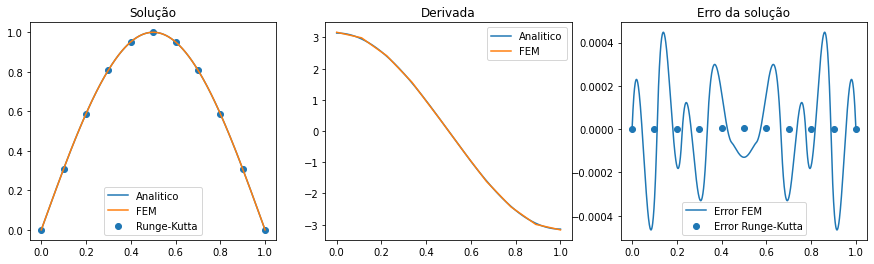

In [11]:
urunge = np.linspace(0, 1, n)
frunge = lambda u, y: np.pi*np.cos(np.pi*u)
wrunge = rungekutta(frunge, w0, urunge)

solution = lambda u: np.sin(np.pi*u)
dsolution = lambda u: f(u)

fig, axis = plt.subplots(1, 3, figsize=(15, 4))
axis[0].plot(uplot, solution(uplot), label=r"Analitico")
axis[0].plot(uplot, wvals @ N[:, p](uplot), label=r"FEM")
axis[0].scatter(urunge, wrunge, label=r"Runge-Kutta")
axis[0].legend()
axis[0].set_title(r"Solução")

axis[1].plot(uplot, dsolution(uplot), label=r"Analitico")
axis[1].plot(uplot, wvals @ Dp @ N[:,p-1](uplot), label=r"FEM")
axis[1].legend()
axis[1].set_title(r"Derivada")

axis[2].plot(uplot, wvals @ N[:, p](uplot) -solution(uplot), label=r"Error FEM")
axis[2].scatter(urunge, wrunge-solution(urunge), label=r"Error Runge-Kutta")
axis[2].legend()
axis[2].set_title(r"Erro da solução")

### Exercicio 5

> Resolva a EDO
>
> $$y' = \pi \cos \pi u$$
> $$0 \le u \le 1 \ \ \ \ \ \ y(0)=0$$
> 
> Solução analítica
>
> $$y(u) = \sin \pi u$$
>
> Utilizando SPlines cúbicas, com pontos igualmente espaçados

In [12]:
def f(u):
    return np.pi*np.cos(np.pi*u)
y0 = 0
uplot = np.linspace(0, 1, 1025)

p, n = 3, 33
U = nurbs.GeneratorKnotVector.uniform(degree=p, npts=n)
N = nurbs.SplineBaseFunction(U)
# Montar a matriz A
Dp = getD(p, U)
Hpp1 = getH(p, p-1, N)
A = Hpp1 @ Dp.T
# Montar a matriz B
G = np.linalg.lstsq(N(uplot).T, f(uplot), rcond=None)[0]
Hpp = getH(p, p, N)
B = Hpp @ G
# Condicao inicial
A[0] = N(0)
B[0] = y0
# Resolver o sistema
wvals = np.linalg.solve(A, B)

Text(0.5, 1.0, 'Erro da solução')

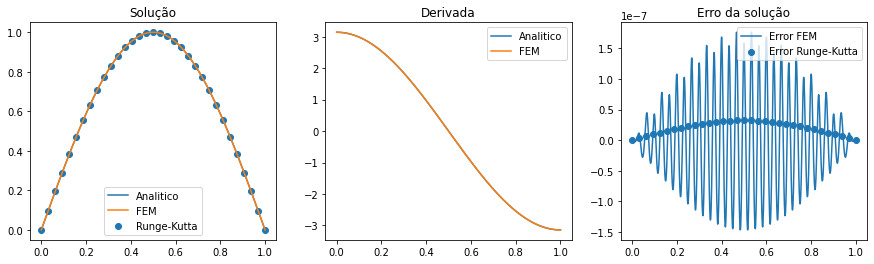

In [13]:
urunge = np.linspace(0, 1, n)
frunge = lambda u, y: np.pi*np.cos(np.pi*u)
wrunge = rungekutta(frunge, w0, urunge)

solution = lambda u: np.sin(np.pi*u)
dsolution = lambda u: f(u)

fig, axis = plt.subplots(1, 3, figsize=(15, 4))
axis[0].plot(uplot, solution(uplot), label=r"Analitico")
axis[0].plot(uplot, wvals @ N[:, p](uplot), label=r"FEM")
axis[0].scatter(urunge, wrunge, label=r"Runge-Kutta")
axis[0].legend()
axis[0].set_title(r"Solução")

axis[1].plot(uplot, dsolution(uplot), label=r"Analitico")
axis[1].plot(uplot, wvals @ Dp @ N[:,p-1](uplot), label=r"FEM")
axis[1].legend()
axis[1].set_title(r"Derivada")

axis[2].plot(uplot, wvals @ N[:, p](uplot) -solution(uplot), label=r"Error FEM")
axis[2].scatter(urunge, wrunge-solution(urunge), label=r"Error Runge-Kutta")
axis[2].legend()
axis[2].set_title(r"Erro da solução")

### Exercicio 6

> Resolva a EDO
>
> $$y' = 2-2u+4u^2-4u^3-4u^4$$
> $$0 \le u \le 1 \ \ \ \ \ \ y(0)=1$$
> 
> Solução analítica
>
> $$y(u) = 1+2u-u^2+ \frac{4}{3}u^3-u^4-\frac{4}{5}u^5$$
> 
> Utilizando SPlines quadráticas, com pontos igualmente espaçados

In [14]:
def f(u):
    return 2 - 2*u + 4*u**2 - 4*u**3 - 4*u**4
y0 = 1
p, n = 2, 11
U = nurbs.GeneratorKnotVector.uniform(degree=p, npts=n)
N = nurbs.SplineBaseFunction(U)
# Montar a matriz A
Dp = getD(p, U)
Hpp1 = getH(p, p-1, N)
A = Hpp1 @ Dp.T
# Montar a matriz B
G = np.linalg.lstsq(N(uplot).T, f(uplot), rcond=None)[0]
Hpp = getH(p, p, N)
B = Hpp @ G
# Condicao inicial
A[0] = N(0)
B[0] = y0
# Resolver o sistema
wvals = np.linalg.solve(A, B)

Text(0.5, 1.0, 'Erro da solução')

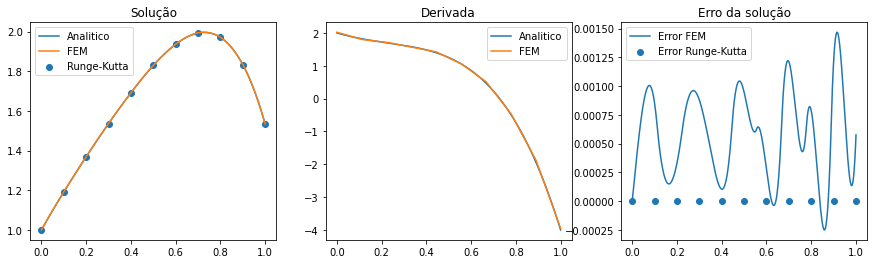

In [15]:
urunge = np.linspace(0, 1, n)
frunge = lambda u, y: 2 - 2*u + 4*u**2 - 4*u**3 - 4*u**4
wrunge = rungekutta(frunge, y0, urunge)

solution = lambda u: 1 + 2*u - u**2 + (4/3)*u**3 - u**4 - (4/5)*u**5
dsolution = lambda u: f(u)

fig, axis = plt.subplots(1, 3, figsize=(15, 4))
axis[0].plot(uplot, solution(uplot), label=r"Analitico")
axis[0].plot(uplot, wvals @ N[:, p](uplot), label=r"FEM")
axis[0].scatter(urunge, wrunge, label=r"Runge-Kutta")
axis[0].legend()
axis[0].set_title(r"Solução")

axis[1].plot(uplot, dsolution(uplot), label=r"Analitico")
axis[1].plot(uplot, wvals @ Dp @ N[:, p-1](uplot), label=r"FEM")
axis[1].legend()
axis[1].set_title(r"Derivada")

axis[2].plot(uplot, wvals @ N[:, p](uplot)-solution(uplot), label=r"Error FEM")
axis[2].scatter(urunge, wrunge-solution(urunge), label=r"Error Runge-Kutta")
axis[2].legend()
axis[2].set_title(r"Erro da solução")

### Exercicio 7

> Resolva a EDO
>
> $$y' = 2-2u+4u^2-4u^3-4u^4$$
> $$0 \le u \le 1 \ \ \ \ \ \ y(0)=1$$
> 
> Solução analítica
>
> $$y(u) = 1+2u-u^2+ \frac{4}{3}u^3-u^4-\frac{4}{5}u^5$$
> 
> Utilizando SPlines cúbicas, com pontos igualmente espaçados

In [16]:
def f(u):
    return 2 - 2*u + 4*u**2 - 4*u**3 - 4*u**4
y0 = 1
p, n = 3, 11
U = nurbs.GeneratorKnotVector.uniform(degree=p, npts=n)
N = nurbs.SplineBaseFunction(U)
# Montar a matriz A
Dp = getD(p, U)
Hpp1 = getH(p, p-1, N)
A = Hpp1 @ Dp.T
# Montar a matriz B
G = np.linalg.lstsq(N(uplot).T, f(uplot), rcond=None)[0]
Hpp = getH(p, p, N)
B = Hpp @ G
# Condicao inicial
A[0] = N(0)
B[0] = y0
# Resolver o sistema
wvals = np.linalg.solve(A, B)

Text(0.5, 1.0, 'Erro da solução')

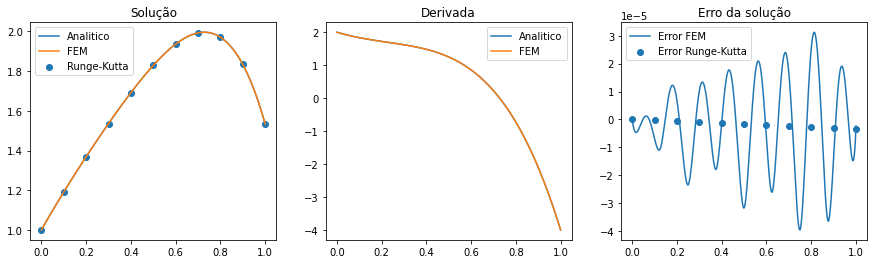

In [17]:
urunge = np.linspace(0, 1, n)
frunge = lambda u, y: 2 - 2*u + 4*u**2 - 4*u**3 - 4*u**4
wrunge = rungekutta(frunge, y0, urunge)

solution = lambda u: 1 + 2*u - u**2 + (4/3)*u**3 - u**4 - (4/5)*u**5
dsolution = lambda u: f(u)

fig, axis = plt.subplots(1, 3, figsize=(15, 4))
axis[0].plot(uplot, solution(uplot), label=r"Analitico")
axis[0].plot(uplot, wvals @ N[:, p](uplot), label=r"FEM")
axis[0].scatter(urunge, wrunge, label=r"Runge-Kutta")
axis[0].legend()
axis[0].set_title(r"Solução")

axis[1].plot(uplot, dsolution(uplot), label=r"Analitico")
axis[1].plot(uplot, wvals @ Dp @ N[:, p-1](uplot), label=r"FEM")
axis[1].legend()
axis[1].set_title(r"Derivada")

axis[2].plot(uplot, wvals @ N[:, p](uplot)-solution(uplot), label=r"Error FEM")
axis[2].scatter(urunge, wrunge-solution(urunge), label=r"Error Runge-Kutta")
axis[2].legend()
axis[2].set_title(r"Erro da solução")

# EDOs de segunda ordem

Agora que já lidamos com EDOs de primeira ordem, podemos atacar problemas de segunda ordem.

$$
\dfrac{d^2y}{du^2} = f(u) \ \ \ \ \ \ \ 0 < u < 1 
$$

Nesses problemas estão inclusos problemas que têm

* Condições iniciais
$$\begin{cases}y(0) = y_0 \\ y'(0) = q_0\end{cases}$$
* Condições de Dirichlet
$$\begin{cases}y(0) = y_0 \\ y(1) = y_1\end{cases}$$
* Condições de Neumann
$$
\begin{cases}
y(0) = y_0 \\
y'(1) = q_1
\end{cases}
 \ \ \ \ \ \ \ \ \ \ \ \ \text{ou} \ \ \ \ \ \ \ \ \ \ \ \
\begin{cases}
y'(0) = q_0 \\
y(1) = y_1
\end{cases}
$$
* Condições de Robin
$$\begin{cases}y(0) = y_0 \\ \alpha y(1) + \beta y'(1) = r_0\end{cases}$$


Iremos abordar os exemplos já com a particulariedade de cada um. 

### Exemplo 8

> Resolva a EDO
>
> $$\dfrac{d^2y}{du^2} = - \pi^2 \sin \pi u$$
> 
> Condições iniciais
>
> $$y(0) = -1 \ \ \ \ \ \ \ \ y'(0) = \pi$$
> 
> Solução analítica
>
> $$y(u) = -1 + \sin \pi u$$
> 
> Utilizando SPlines lineares/quadráticas/cúbicas, com pontos igualmente espaçados

Para o caso de condições iniciais, já temos que

$$w(0) = y_0 \Rightarrow w_0 = y_0$$

Agora, para a derivada, teremos

$$\dfrac{dw}{du} = \dfrac{d}{du} \sum_{j=0}^{n-1} N_{ip}(u) \cdot w_{i} = \sum_{j=0}^{n-1} N_{ip}'(u) \cdot w_{i}$$
$$q_0 = \dfrac{dw}{du}(0) = \dfrac{p}{u_{p+1}-u_{1}} \cdot \left(w_{1}-w_{0}\right)$$
$$
w_{1} = w_{0} + \dfrac{q_0}{p} \cdot (u_{p+1}-u_{1})
$$

Já para a formulação, teremos:

$$
\int_{0}^{1} \left(\dfrac{d^2w}{du^2} - f\right) \cdot N_{ip} \ du = 0 \ \ \ \ \forall i = 2, \ \cdots, \ n-1
$$
$$
\sum_{j=0}^{n-1} \underbrace{\left(\int_{0}^{1} N_{ip} \cdot \dfrac{d^2 N_{jp}}{du^2} \ du\right)}_{A_{ij}} \cdot w_{j} = \underbrace{\int_{0}^{1} f \cdot N_{ip} \ du}_{B_i}
$$
$$\begin{align*} 
A_{ij} & = \int_{0}^{1} N_{ip} \cdot \dfrac{d^2N_{jp}}{du^2} \ du \\
& = \left[N_{ip} \cdot \dfrac{dN_{jp}}{du}\right]_{0}^{1} - \int_{0}^{1} \dfrac{dN_{ip}}{du} \cdot \dfrac{dN_{jp}}{du} \ du \\ 
[A] & = \left( \left[N_{p}\right] \otimes \left[\dfrac{dN_{p}}{du}\right] \right)_{0}^{1} - \int_{0}^{1} \left[\dfrac{dN_{p}}{du}\right] \otimes \left[\dfrac{dN_{p}}{du}\right] \ du \\
& = \left(\left[N_{p}\right] \otimes \left[N_{p-1}\right]\right)_{0}^{1} \left[D_{p}\right]^{T} - \int_{0}^{1} \left(\left[D_{p}\right]\left[N_{p-1}\right]\right) \otimes \left(\left[D_{p}\right] \left[N_{p-1}\right]\right) \ du \\
& = \underbrace{\left(\left[N_{p}\right] \otimes \left[N_{p-1}\right]\right)_{0}^{1}}_{U_{bound}} \left[D_{p}\right]^{T} - \left[D_{p}\right] \underbrace{\left(\int_{0}^{1}\left[N_{p-1}\right] \otimes \left[N_{p-1}\right] \ du\right)}_{H_{p-1,p-1}} \left[D_{p}\right]^{T} \\
& = \left[U_{bound}\right] \left[D_p\right]^{T} - \left[D_{p}\right] \left[H_{p-1,p-1}\right] \left[D_{p}\right]^{T}
\end{align*}$$


In [18]:
def f(u):
    return -(np.pi**2) * np.sin(np.pi*u)
y0 = -1
q0 = np.pi
uplot = np.linspace(0, 1, 1025)

n = 7
femsolutions = []
for p in range(1, 5):
    U = nurbs.GeneratorKnotVector.uniform(p, n)
    N = nurbs.SplineBaseFunction(U)
    # Montar a matriz A
    Dp = getD(p, U)
    Hp1p1 = getH(p-1, p-1, N)
    Ubound = np.tensordot( N[:, p](1), N[:, p-1](1), axes=0)
    Ubound -= np.tensordot( N[:, p](0), N[:, p-1](0), axes=0)
    A = Ubound @ Dp.T
    A -= Dp @ Hp1p1 @ Dp.T
    # Montar a matriz B
    G = np.linalg.lstsq(N(uplot).T, f(uplot), rcond=None)[0]
    Hpp = getH(p, p, N)
    B = Hpp @ G
    # Condicao inicial
    A[0] = N[:, p](0)  # Substituimos a primeira linha
    B[0] = y0
    A[-1] = Dp @ N[:, p-1](0)  # Substituimos a ultima lina
    B[-1] = q0
    # Resolver o sistema
    wvals = np.linalg.solve(A, B)
    femsolutions.append((wvals, N))

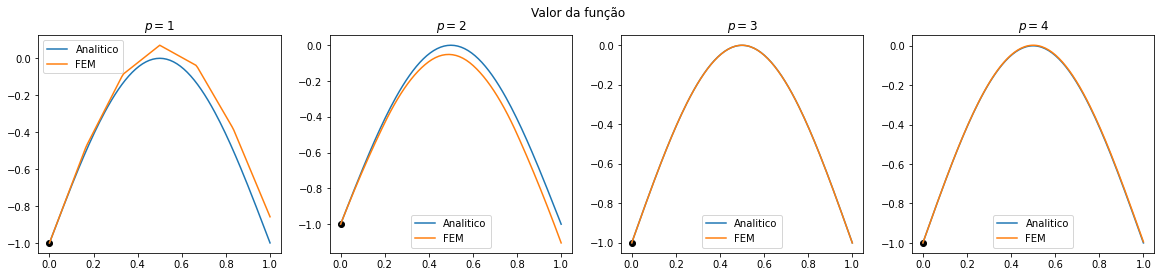

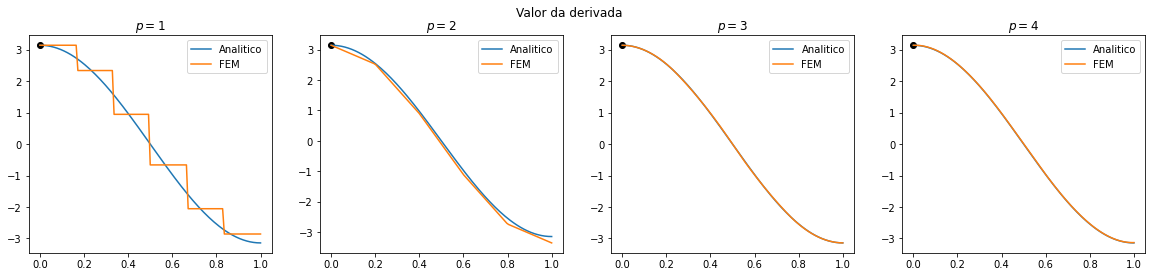

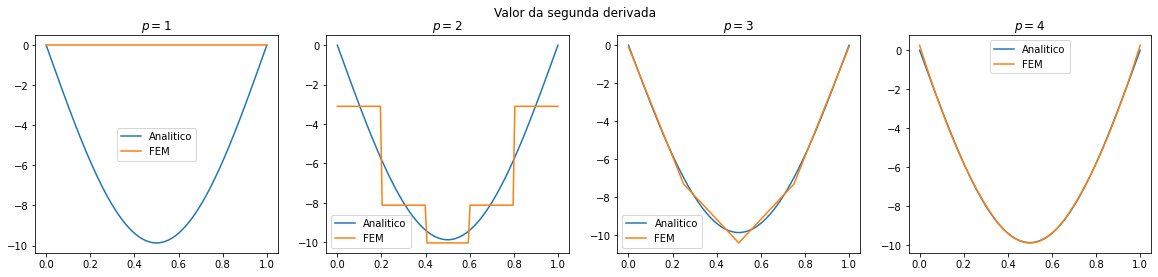

In [19]:
solution = lambda u: -1+np.sin(np.pi*u)
dsolution = lambda u: np.pi*np.cos(np.pi*u)
ddsolution = lambda u: f(u)

uplot = np.linspace(0, 1, 129)
for derivada in range(3):
    fig, axis = plt.subplots(1, 4, figsize=(20, 4))
    for ooo, (wvals, N) in enumerate(femsolutions):
        n, p, U = N.npts, N.degree, N.knotvector
        Dp0 = getD(p, U)
        Dp1 = getD(p-1, U)
        if derivada == 0:
            fig.suptitle("Valor da função")
            wplot = wvals @ N[:, p](uplot)
            axis[ooo].plot(uplot, solution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, wplot, label=r"FEM")
        elif derivada == 1:
            fig.suptitle("Valor da derivada")
            dwplot = wvals @ Dp0 @ N[:, p-1](uplot)
            axis[ooo].plot(uplot, dsolution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, dwplot, label=r"FEM")
        elif derivada == 2:
            fig.suptitle("Valor da segunda derivada")
            if p != 1:
                ddwplot = wvals @ Dp0 @ Dp1 @ N[:, p-2](uplot)
            else:
                ddwplot = np.zeros(len(uplot)) 
            axis[ooo].plot(uplot, ddsolution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, ddwplot, label=r"FEM")
        axis[ooo].legend()
        axis[ooo].set_title(r"$p = %d$"%p)
        if derivada == 0:
            axis[ooo].scatter(0, y0, color="k")
        if derivada == 1:
            axis[ooo].scatter(0, q0, color="k")


### Exemplo 9

> Resolva a EDO
>
> $$\dfrac{d^2y}{du^2} = - \pi^2 \sin \pi u$$
> 
> Condições de contorno
>
> $$y(0) = -1 \ \ \ \ \ \ \ \ y(1) = -1$$
> 
> Solução analítica
>
> $$y(u) = -1 + \sin \pi u$$
> 
> Utilizando SPlines lineares/quadráticas/cúbicas, com pontos igualmente espaçados

In [20]:
def f(u):
    return -(np.pi**2) * np.sin(np.pi*u)
y0 = -1
y1 = -1
uplot = np.linspace(0, 1, 1025)

n = 7
femsolutions = []
for p in range(1, 5):
    U = nurbs.GeneratorKnotVector.uniform(p, n)
    N = nurbs.SplineBaseFunction(U)
    # Montar a matriz A
    Dp = getD(p, U)
    Hp1p1 = getH(p-1, p-1, N)
    Ubound = np.tensordot( N[:, p](1), N[:, p-1](1), axes=0)
    Ubound -= np.tensordot( N[:, p](0), N[:, p-1](0), axes=0)
    A = Ubound @ Dp.T
    A -= Dp @ Hp1p1 @ Dp.T
    # Montar a matriz B
    G = np.linalg.lstsq(N(uplot).T, f(uplot), rcond=None)[0]
    Hpp = getH(p, p, N)
    B = Hpp @ G
    # Condicao inicial
    A[0] = N[:, p](0)  # Substituimos a primeira linha
    B[0] = y0
    A[-1] = N[:, p](1)  # Substituimos a ultima lina
    B[-1] = y1
    # Resolver o sistema
    wvals = np.linalg.solve(A, B)
    femsolutions.append( (wvals, N) )

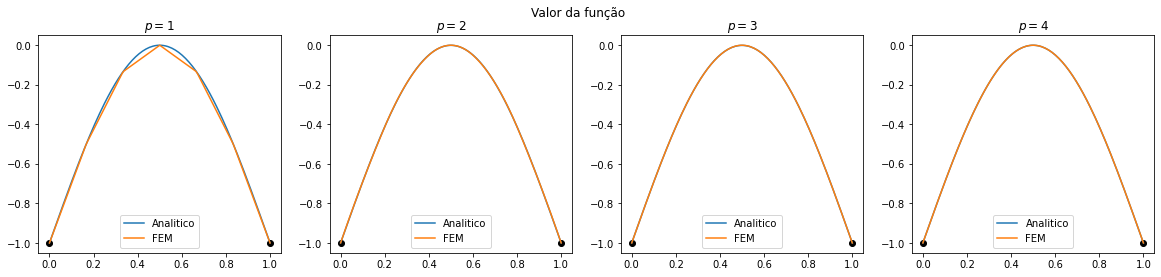

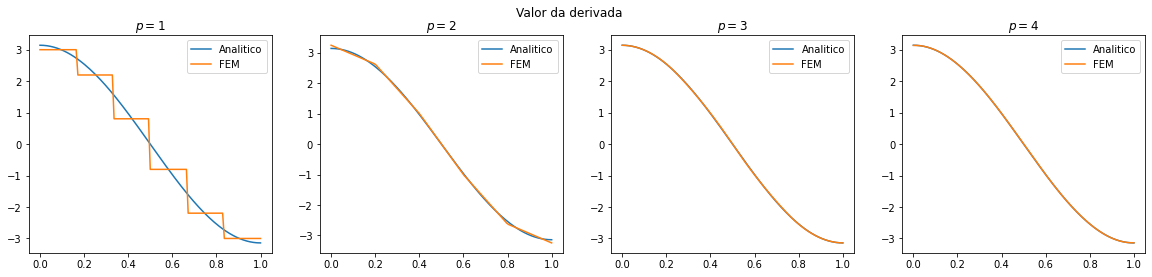

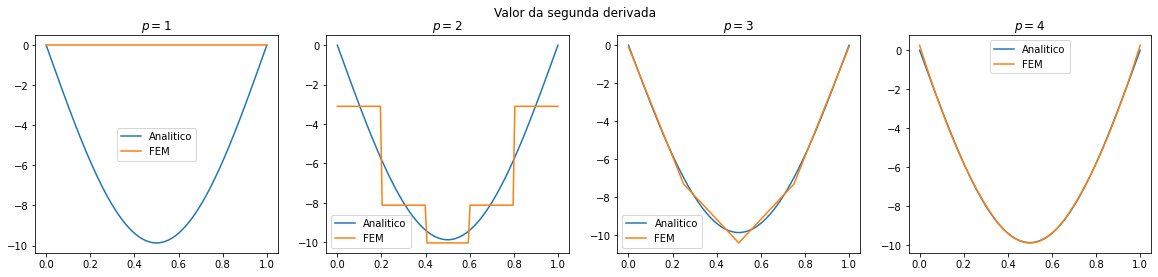

In [21]:
solution = lambda u: -1+np.sin(np.pi*u)
dsolution = lambda u: np.pi*np.cos(np.pi*u)
ddsolution = lambda u: f(u)

uplot = np.linspace(0, 1, 129)
for derivada in range(3):
    fig, axis = plt.subplots(1, 4, figsize=(20, 4))
    for ooo, (wvals, N) in enumerate(femsolutions):
        n, p, U = N.npts, N.degree, N.knotvector
        Dp0 = getD(p, U)
        Dp1 = getD(p-1, U)
        if derivada == 0:
            fig.suptitle("Valor da função")
            wplot = wvals @ N[:, p](uplot)
            axis[ooo].plot(uplot, solution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, wplot, label=r"FEM")
        elif derivada == 1:
            fig.suptitle("Valor da derivada")
            dwplot = wvals @ Dp0 @ N[:, p-1](uplot)
            axis[ooo].plot(uplot, dsolution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, dwplot, label=r"FEM")
        elif derivada == 2:
            fig.suptitle("Valor da segunda derivada")
            if p != 1:
                ddwplot = wvals @ Dp0 @ Dp1 @ N[:, p-2](uplot)
            else:
                ddwplot = np.zeros(len(uplot)) 
            axis[ooo].plot(uplot, ddsolution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, ddwplot, label=r"FEM")
        axis[ooo].legend()
        axis[ooo].set_title(r"$p = %d$"%p)
        if derivada == 0:
            axis[ooo].scatter(0, y0, color="k")
            axis[ooo].scatter(1, y1, color="k")

### Exemplo 10

> Resolva a EDO
>
> $$\dfrac{d^2y}{du^2} = - \pi^2 \sin \pi u$$
> 
> Condições de Neumann
>
> $$y(0) = -1 \ \ \ \ \ \ \ \ y'(1) = -\pi$$
> 
> Solução analítica
>
> $$y(u) = -1 + \sin \pi u$$
> 
> Utilizando SPlines lineares/quadráticas/cúbicas, com pontos igualmente espaçados

In [22]:
def f(u):
    return -(np.pi**2) * np.sin(np.pi*u)
y0 = -1
q1 = -np.pi
uplot = np.linspace(0, 1, 1025)

n = 7
femsolutions = []
for p in range(1, 5):
    U = nurbs.GeneratorKnotVector.uniform(p, n)
    N = nurbs.SplineBaseFunction(U)
    # Montar a matriz A
    Dp = getD(p, U)
    Hp1p1 = getH(p-1, p-1, N)
    Ubound = np.tensordot( N[:, p](1), N[:, p-1](1), axes=0)
    Ubound -= np.tensordot( N[:, p](0), N[:, p-1](0), axes=0)
    A = Ubound @ Dp.T
    A -= Dp @ Hp1p1 @ Dp.T
    # Montar a matriz B
    G = np.linalg.lstsq(N(uplot).T, f(uplot), rcond=None)[0]
    Hpp = getH(p, p, N)
    B = Hpp @ G
    # Condicao inicial
    A[0] = N[:, p](0)  # Substituimos a primeira linha
    B[0] = y0
    A[-1] = Dp @ N[:, p-1](1)  # Substituimos a ultima lina
    B[-1] = q1
    # Resolver o sistema
    wvals = np.linalg.solve(A, B)
    femsolutions.append( (wvals, N) )

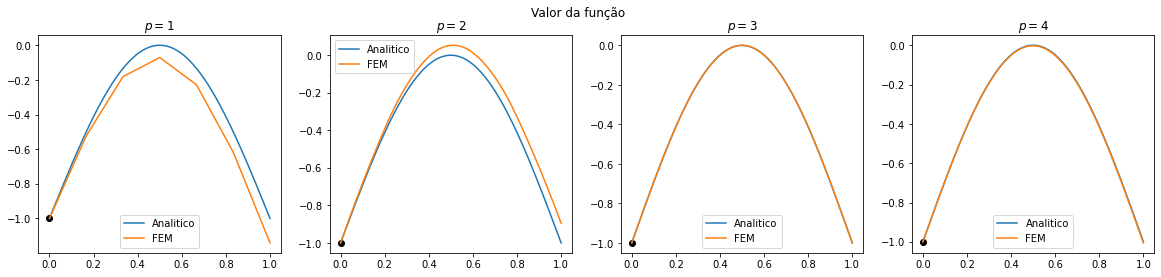

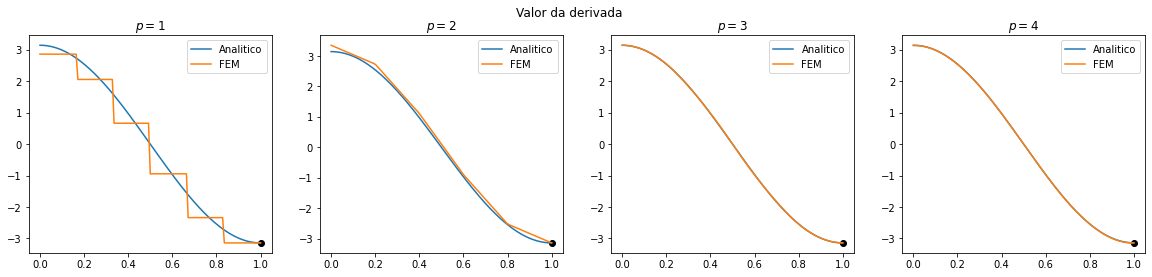

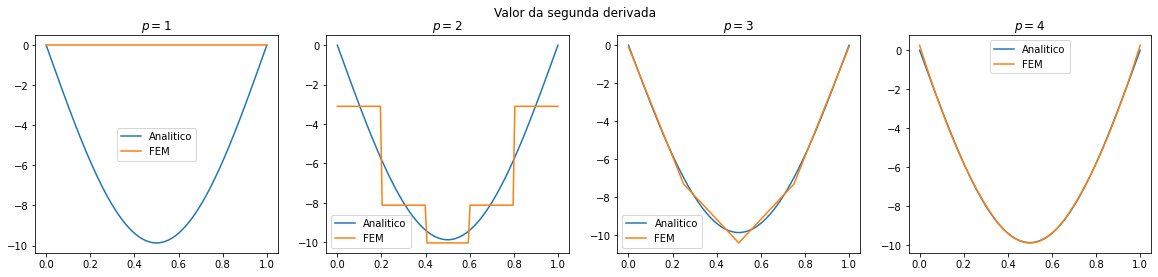

In [23]:
solution = lambda u: -1+np.sin(np.pi*u)
dsolution = lambda u: np.pi*np.cos(np.pi*u)
ddsolution = lambda u: f(u)

uplot = np.linspace(0, 1, 129)
for derivada in range(3):
    fig, axis = plt.subplots(1, 4, figsize=(20, 4))
    for ooo, (wvals, N) in enumerate(femsolutions):
        n, p, U = N.npts, N.degree, N.knotvector
        Dp0 = getD(p, U)
        Dp1 = getD(p-1, U)
        if derivada == 0:
            fig.suptitle("Valor da função")
            wplot = wvals @ N[:, p](uplot)
            axis[ooo].plot(uplot, solution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, wplot, label=r"FEM")
        elif derivada == 1:
            fig.suptitle("Valor da derivada")
            dwplot = wvals @ Dp0 @ N[:, p-1](uplot)
            axis[ooo].plot(uplot, dsolution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, dwplot, label=r"FEM")
        elif derivada == 2:
            fig.suptitle("Valor da segunda derivada")
            if p != 1:
                ddwplot = wvals @ Dp0 @ Dp1 @ N[:, p-2](uplot)
            else:
                ddwplot = np.zeros(len(uplot)) 
            axis[ooo].plot(uplot, ddsolution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, ddwplot, label=r"FEM")
        axis[ooo].legend()
        axis[ooo].set_title(r"$p = %d$"%p)
        if derivada == 0:
            axis[ooo].scatter(0, y0, color="k")
        if derivada == 1:
            axis[ooo].scatter(1, q1, color="k")

### Exemplo 11

> Resolva a EDO
>
> $$\dfrac{d^2y}{du^2} = - \pi^2 \sin \pi u$$
> 
> Condições de Neumann
>
> $$y'(0) = \pi \ \ \ \ \ \ \ \ y(1) = -1$$
> 
> Solução analítica
>
> $$y(u) = -1 + \sin \pi u$$
> 
> Utilizando SPlines lineares/quadráticas/cúbicas, com pontos igualmente espaçados

In [24]:
def f(u):
    return -(np.pi**2) * np.sin(np.pi*u)
q0 = np.pi
y1 = -1
uplot = np.linspace(0, 1, 1025)

n = 7
femsolutions = []
for p in range(1, 5):
    U = nurbs.GeneratorKnotVector.uniform(p, n)
    N = nurbs.SplineBaseFunction(U)
    # Montar a matriz A
    Dp = getD(p, U)
    Hp1p1 = getH(p-1, p-1, N)
    Ubound = np.tensordot( N[:, p](1), N[:, p-1](1), axes=0)
    Ubound -= np.tensordot( N[:, p](0), N[:, p-1](0), axes=0)
    A = Ubound @ Dp.T
    A -= Dp @ Hp1p1 @ Dp.T
    # Montar a matriz B
    G = np.linalg.lstsq(N(uplot).T, f(uplot), rcond=None)[0]
    Hpp = getH(p, p, N)
    B = Hpp @ G
    # Condicao inicial
    A[0] = Dp @ N[:, p-1](0)  # Substituimos a primeira linha
    B[0] = q0
    A[-1] = N[:, p](1)  # Substituimos a ultima lina
    B[-1] = y1
    # Resolver o sistema
    wvals = np.linalg.solve(A, B)
    femsolutions.append( (wvals, N) )

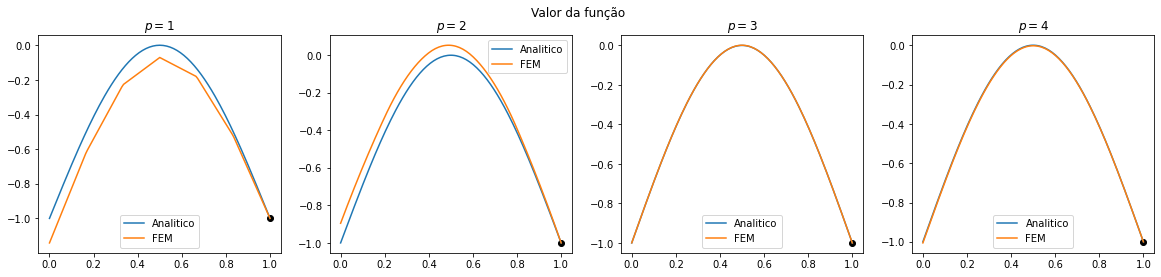

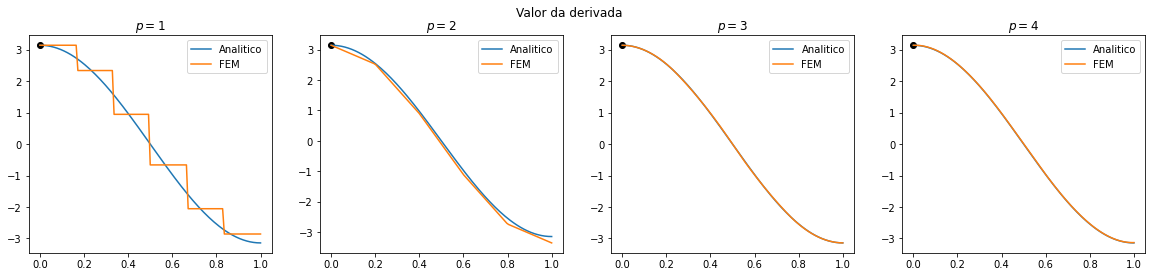

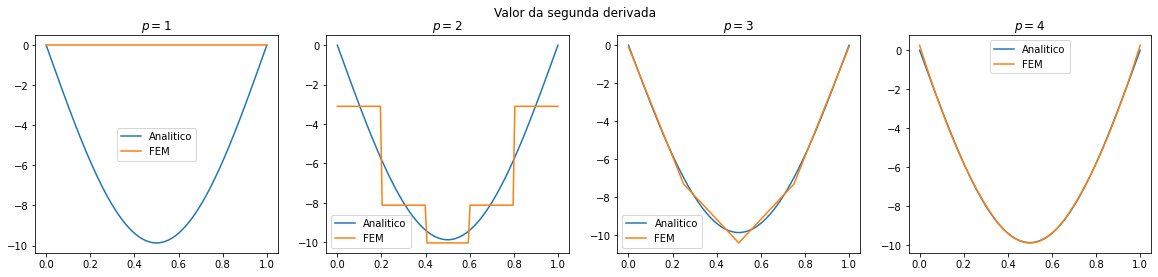

In [25]:
solution = lambda u: -1+np.sin(np.pi*u)
dsolution = lambda u: np.pi*np.cos(np.pi*u)
ddsolution = lambda u: f(u)

uplot = np.linspace(0, 1, 129)
for derivada in range(3):
    fig, axis = plt.subplots(1, 4, figsize=(20, 4))
    for ooo, (wvals, N) in enumerate(femsolutions):
        n, p, U = N.npts, N.degree, N.knotvector
        Dp0 = getD(p, U)
        Dp1 = getD(p-1, U)
        if derivada == 0:
            fig.suptitle("Valor da função")
            wplot = wvals @ N[:, p](uplot)
            axis[ooo].plot(uplot, solution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, wplot, label=r"FEM")
        elif derivada == 1:
            fig.suptitle("Valor da derivada")
            dwplot = wvals @ Dp0 @ N[:, p-1](uplot)
            axis[ooo].plot(uplot, dsolution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, dwplot, label=r"FEM")
        elif derivada == 2:
            fig.suptitle("Valor da segunda derivada")
            if p != 1:
                ddwplot = wvals @ Dp0 @ Dp1 @ N[:, p-2](uplot)
            else:
                ddwplot = np.zeros(len(uplot)) 
            axis[ooo].plot(uplot, ddsolution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, ddwplot, label=r"FEM")
        axis[ooo].legend()
        axis[ooo].set_title(r"$p = %d$"%p)
        if derivada == 0:
            axis[ooo].scatter(1, y1, color="k")
        if derivada == 1:
            axis[ooo].scatter(0, q0, color="k")

### Exemplo 12

> Resolva a EDO
>
> $$\dfrac{d^2y}{du^2} = - \pi^2 \sin \pi u$$
> 
> Condições de Robin
>
> $$y(0) = -1 \ \ \ \ \ \ \ \ \pi \cdot y(1) + y'(1) = -2\pi$$
> 
> Solução analítica
>
> $$y(u) = -1 + \sin \pi u$$
> 
> Utilizando SPlines lineares/quadráticas/cúbicas, com pontos igualmente espaçados

In [26]:
def f(u):
    return -(np.pi**2) * np.sin(np.pi*u)
y0 = -1
r1 = -2*np.pi
uplot = np.linspace(0, 1, 1025)

n = 7
femsolutions = []
for p in range(1, 5):
    U = nurbs.GeneratorKnotVector.uniform(p, n)
    N = nurbs.SplineBaseFunction(U)
    # Montar a matriz A
    Dp = getD(p, U)
    Hp1p1 = getH(p-1, p-1, N)
    Ubound = np.tensordot( N[:, p](1), N[:, p-1](1), axes=0)
    Ubound -= np.tensordot( N[:, p](0), N[:, p-1](0), axes=0)
    A = Ubound @ Dp.T
    A -= Dp @ Hp1p1 @ Dp.T
    # Montar a matriz B
    G = np.linalg.lstsq(N(uplot).T, f(uplot), rcond=None)[0]
    Hpp = getH(p, p, N)
    B = Hpp @ G
    # Condicao inicial
    A[0] = N[:, p](0)  # Substituimos a primeira linha
    B[0] = y0
    A[-1] = np.pi * N[:, p](1) + Dp @ N[:, p-1](1)  # Substituimos a ultima lina
    B[-1] = r1
    # Resolver o sistema
    wvals = np.linalg.solve(A, B)
    femsolutions.append( (wvals, N) )

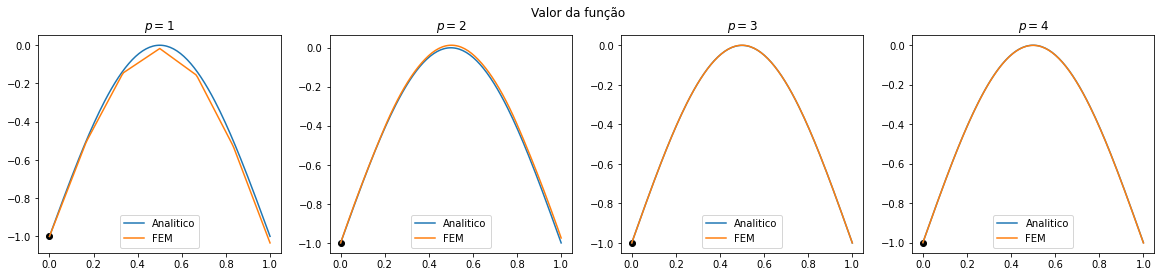

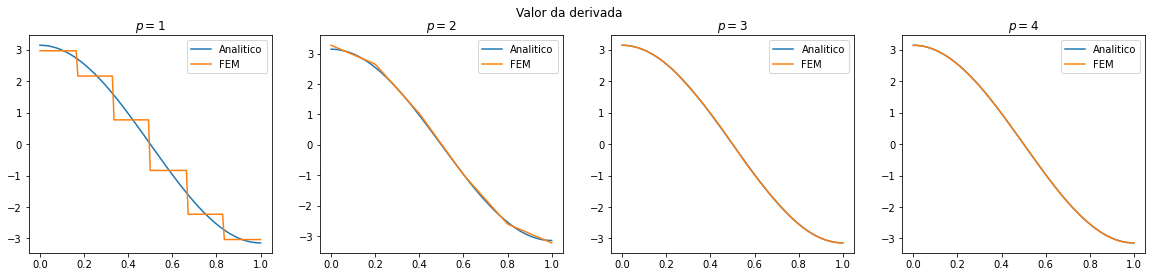

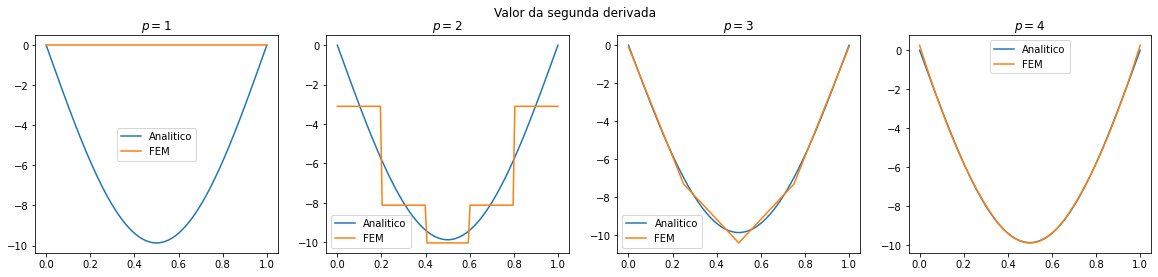

In [27]:
solution = lambda u: -1+np.sin(np.pi*u)
dsolution = lambda u: np.pi*np.cos(np.pi*u)
ddsolution = lambda u: f(u)

uplot = np.linspace(0, 1, 129)
for derivada in range(3):
    fig, axis = plt.subplots(1, 4, figsize=(20, 4))
    for ooo, (wvals, N) in enumerate(femsolutions):
        n, p, U = N.npts, N.degree, N.knotvector
        Dp0 = getD(p, U)
        Dp1 = getD(p-1, U)
        if derivada == 0:
            fig.suptitle("Valor da função")
            wplot = wvals @ N[:, p](uplot)
            axis[ooo].plot(uplot, solution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, wplot, label=r"FEM")
        elif derivada == 1:
            fig.suptitle("Valor da derivada")
            dwplot = wvals @ Dp0 @ N[:, p-1](uplot)
            axis[ooo].plot(uplot, dsolution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, dwplot, label=r"FEM")
        elif derivada == 2:
            fig.suptitle("Valor da segunda derivada")
            if p != 1:
                ddwplot = wvals @ Dp0 @ Dp1 @ N[:, p-2](uplot)
            else:
                ddwplot = np.zeros(len(uplot)) 
            axis[ooo].plot(uplot, ddsolution(uplot), label=r"Analitico")
            axis[ooo].plot(uplot, ddwplot, label=r"FEM")
        axis[ooo].legend()
        axis[ooo].set_title(r"$p = %d$"%p)
        if derivada == 0:
            axis[ooo].scatter(0, y0, color="k")

# Apêndice


É possível obter matrizes de ordem maiores. Mas antes, seja a razão $r_{i}$ entre os comprimentos $h_{k+i}$ e $h_{k}$ então:

$$
r_{-2} = \dfrac{h_{k-2}}{h_{k}}\ \ \ \ \ \ r_{-1} = \dfrac{h_{k-1}}{h_k}\ \ \ \ \ \ r_{1} = \dfrac{h_{k+1}}{h_k} \ \ \ \ \ \ r_{2} = \dfrac{h_{k+2}}{h_k}
$$


#### Ordem 2

> $$a = 1 + r_{-1} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ b = 1 + r_{1}$$
> $$\left[M_{02}\right] = \begin{bmatrix} 0 & 1 & 0\end{bmatrix}+\dfrac{1}{3a}\begin{bmatrix} 1 & -1 & 0 \end{bmatrix}+\dfrac{1}{3b}\begin{bmatrix} 0 & -1 & 1 \end{bmatrix}$$
> $$\left[M_{12}\right] = \dfrac{1}{2}\begin{bmatrix} 0 & 1 & 0 \\ 0 & 1 & 0 \end{bmatrix}+\dfrac{1}{6a}\begin{bmatrix} 0  & -1  & 1 \\ 0 & -3 & 3\end{bmatrix}+\dfrac{1}{6b}\begin{bmatrix} 3 & -3 & 0 \\ 1 & -1 & 0\end{bmatrix}$$
> $$\left[M_{22}\right] = B_1 - \dfrac{1}{3a}B_a - \dfrac{1}{3b}B_b + \dfrac{1}{5a^2}B_{aa}+\dfrac{1}{30ab}B_{ab}+\dfrac{1}{5b^2} B_{bb}$$
> $$B_1 = \begin{bmatrix}0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix} \ \ \ \ \ \ \ \ B_a = \begin{bmatrix}0 & -1 & 0 \\ -1 & 2 & 0 \\ 0 & 0 & 0\end{bmatrix} \ \ \ \ \ \ \ \ B_b = \begin{bmatrix}0 & 0 & 0 \\ 0 & 2 & -1 \\ 0 & -1 & 0\end{bmatrix}$$
> $$B_{aa} = \begin{bmatrix}1 & -1 & 0 \\ -1 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix} \ \ \ \ \ \ \ \ B_{ab} = \begin{bmatrix}0 & -1 & 1 \\ -1 & 2 & -1 \\ 1 & -1 & 0\end{bmatrix} \ \ \ \ \ \ \ \ B_{bb} = \begin{bmatrix}0 & 0 & 0 \\ 0 & 1 & -1 \\ 0 & -1 & 1\end{bmatrix}$$

#### Ordem 3


> $$\begin{align*}a & = 1 + r_{-1} + r_{-2} \\ b & = 1 + r_{-1} \\ c & = 1 + r_{-1} + r_{1} \\ d &= 1 + r_{1} \\ e &= 1 + r_{1}+ r_{2}\end{align*}$$
>
> $$\begin{align*}\left[^{k}M_{33}\right] & = 
\dfrac{1}{7a^2b^2}\begin{bmatrix}1& -1 & 0 & 0 \\ -1 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{bmatrix} + \dfrac{1}{140abde}\begin{bmatrix} 0 & 0 & -1 & 1 \\ 0 & 0 & 1 & -1 \\ -1 & 1 & 0 & 0 \\ 1 & -1 & 0 & 0 \end{bmatrix} + \dfrac{1}{7d^2e^2}\begin{bmatrix}0& 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & -1 \\ 0 & 0 & -1 & 1 \end{bmatrix}\end{align*}$$

#### Order $p$

> Neste caso obter as matrizes é muito complexo e então compensa fazer uma integração numérica.
> 
> Seja 
>
> $$M_{yp} = \dfrac{1}{u_{k+1}-u_k}\int_{u_{k}}^{u_{k+1}} \left[N_{y}\right] \otimes \left[N_{p}\right] \ du$$
>
> $$\left[M_{yp}\right]_{ij} = \dfrac{1}{u_{k+1}-u_k} \int_{u_k}^{u_{k+1}} N_{iy}(u)\cdot N_{jp}(u) \ du$$
>
> A ideia é: como $N_{iy}$ é um polinômio de ordem $y$ e $N_{jp}$ é um polinômio de ordem $p$ no intervalo $\left[u_k, \ u_{k+1}\right]$, então $N_{iy}\cdot N_{jp}$ é um polinômio de ordem $(y+p)$, de forma que para integrar numericamente (sem erro), é necessário $(y+p+1)$ pontos.
>
> Então, pegamos $(y+p+1)$ pontos igualmente distribuidos no intervalo $\left[u_{k}, \ u_{k+1}\right]$ e interpolamos por uma curva de bezier de ordem $(y+p+1)$ com pontos de controle $Q_z$ e então integramos a curva de bezier:
>
> $$\sum_{q = 0}^{y+p} B_{q}\left(\dfrac{z}{y+p}\right) \cdot Q_{q} = N_{iy}\left(t_z\right) \cdot N_{jp}\left(t_z\right) \ \ \ \ \ \ \forall z  \in  \left\{0, \ \cdots, \ y+p \right\}$$
> $$t_z = \left(1-\dfrac{z}{y+p}\right)u_{k}+\dfrac{z}{y+p}\cdot u_{k+1}$$
> 
> $$\begin{bmatrix}
B_{0}\left(0\right) & B_{1}\left(0\right) & \cdots & B_{y+p}\left(0\right) \\
B_{0}\left(\frac{1}{y+p}\right) & B_{1}\left(\frac{1}{y+p}\right) & \cdots & B_{y+p}\left(\frac{1}{y+p}\right) \\
\vdots & \vdots & \ddots & \vdots \\
B_{0}\left(1\right) & B_{1}\left(1\right) & \cdots & B_{y+p}\left(1\right) \\
\end{bmatrix}\begin{bmatrix}Q_0 \\ Q_1 \\ \vdots \\ Q_{y+p}\end{bmatrix} =
\begin{bmatrix}N_{iy}(t_0)N_{jp}(t_0) \\ N_{iy}(t_1) N_{jp}(t_1) \\ \vdots \\ N_{iy}(t_{y+p})N_{jp}(t_{y+p}\end{bmatrix}$$
> 
> Em que a função de bezier é dado por
>
> $$B_{q}(u) = \binom{y+p}{q}\left(1-u\right)^{y+p-q} u^{q}$$
>
> Assim, após resolvido o sistema linear, a integral fica:
>
> $$\begin{align*}\left[M_{yp}\right]_{ij}&=\dfrac{1}{u_{k+1}-u_{k}}\int_{u_k}^{u_{k+1}} N_{iy}(u)N_{jp}(u) \ du \\ & = \int_{0}^{1}\sum_{q=0}^{y+p}B_{q}(t)\cdot Q_{q} dt \\ & = \sum_{q=0}^{y+p}\left(\binom{y+p}{q}\int_{0}^{1} (1-t)^{y+p-q} \cdot t^{q} \ dt\right) \cdot Q_{q} \\ & = \sum_{q=0}^{y+p}\left(\binom{y+p}{q} \cdot \dfrac{1}{y+p+1} \cdot \dfrac{1}{\binom{y+p}{q}}\right) \cdot Q_{q} \\ & = \dfrac{1}{y+p+1} \sum_{q=0}^{y+p} Q_{q}\end{align*}$$